In [78]:
import pickle
fr=open("predict1124.txt","rb")
result=pickle.load(fr)
con_p=result[0][-30:]
act_p=result[1][-30:]

In [79]:
print(con_p,act_p)

[713.1, 702.4, 705.0, 671.4, 648.5, 644.0, 609.5, 608.9, 610.7, 630.1, 634.1, 705.6, 699.9, 693.5, 684.9, 691.4, 676.7, 680.9, 660.1, 674.6, 660.1, 663.1, 673.4, 670.8, 672.6, 673.7, 683.2, 696.7, 706.6, 706.3] [691.4, 627.1, 669.3, 667.9, 646.2, 644.1, 614.0, 609.7, 608.5, 641.8, 624.3, 695.5, 702.4, 722.0, 699.7, 679.6, 671.0, 702.0, 662.6, 652.2, 664.0, 662.2, 666.4, 666.7, 672.8, 696.2, 699.0, 711.2, 727.2, 727.7]


In [40]:
import pandas as pd

data=pd.read_csv(r"data.csv")
data=data.iloc[-30:,:]
con=data['con_settlement'].values.tolist()
con_closing=data['con_closing'].values.tolist()
act=data['act_settlement'].values.tolist()
act_closing=data['act_closing'].values.tolist()

In [41]:
print(con,act)

[706.9, 721.7, 688.4, 644.7, 650.7, 625.5, 612.9, 613.1, 627.2, 631.7, 698.9, 702.4, 688.5, 684.5, 687.6, 677.6, 678.5, 666.2, 664.5, 667.3, 671.7, 670.0, 670.6, 674.5, 683.6, 680.0, 684.7, 696.0, 696.5, 700.0] [649.4, 635.9, 642.6, 649.3, 655.8, 625.5, 612.9, 613.1, 627.2, 631.7, 698.9, 702.4, 688.5, 684.5, 687.6, 670.8, 671.9, 662.4, 667.2, 670.7, 670.0, 670.9, 673.0, 678.4, 688.2, 683.5, 684.7, 696.0, 696.5, 700.0]


In [101]:
count=0
count1=0
count2=0
count3=0
count4=0
for i in range(2,30):
    if (con_p[i]-con[i-1])*(con[i]-con[i-1])>0:
        count+=1
    if (con_p[i]-con[i-1])*(con[i-1]-con[i-2])>0:
        count1+=1
    if (con_p[i]-con[i-1])*(con_closing[i-1]-con_closing[i-2])>0:
        count2+=1
    if (con_p[i]-con[i-1])*(con_closing[i-1]-con[i])>0:
        count3+=1
    if (con[i]-con[i-1])*(con_closing[i-1]-con_closing[i-2])>0:
        count4+=1
count/28,count1/28,count2/28,count3/28,count4/28

(0.7142857142857143,
 0.5,
 0.6785714285714286,
 0.5357142857142857,
 0.5357142857142857)

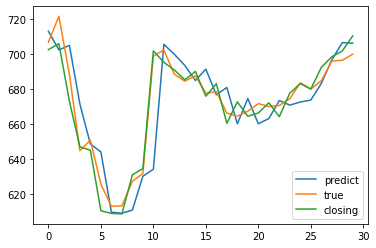

In [81]:
import matplotlib.pyplot as plt

plt.plot(con_p,label="predict")
plt.plot(con,label="true")
plt.plot(con_closing,label="closing")
plt.legend()
plt.show()

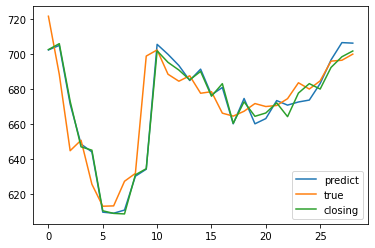

In [82]:
plt.plot(con_p[1:],label="predict")
plt.plot(con[1:],label="true")
plt.plot(con_closing[:-1],label="closing")
plt.legend()
plt.show()

0.7333333333333333 [0.00877068892346873, -0.026742413745323636, 0.02411388727484024, 0.04141461144718463, -0.0033809743353312516, 0.029576338928856916, -0.005547397617882163, -0.006850432229652659, -0.026307397959183673, -0.0025328478708247946, -0.0927171269137215, 0.004555808656036511, 0.016557734204792996, 0.013148283418553688, -0.003926701570680694, 0.020365997638724844, -0.0026529108327191667, 0.022065445812068343, -0.00662151993980433, 0.010939607372995756, -0.017269614411195507, -0.010298507462686533, 0.004175365344467573, -0.00548554484803565, -0.01609128145114102, -0.009264705882352875, -0.0021907404702789543, 0.0010057471264368469, 0.014501076812634635, 0.008999999999999935]


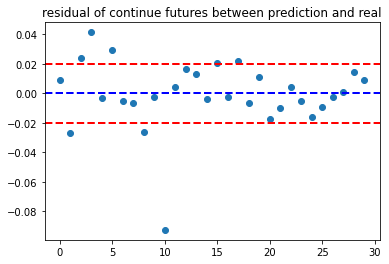

In [103]:
ratio=[]
count=0
for i in range(len(con)):
    ratio.append((con_p[i]-con[i])/con[i])
    if abs((con[i]-con_p[i])/con[i])<=0.02:
        count+=1
print(count/30,ratio)
plt.scatter(range(30),ratio)
plt.axhline(y=0.02, c="r", ls="--", lw=2)
plt.axhline(y=-0.02, c="r", ls="--", lw=2)
plt.axhline(y=0, c="b", ls="--", lw=2)
plt.title("residual of continue futures between prediction and real")
# plt.legend()
plt.show()

In [84]:
count=0
count1=0
count2=0
for i in range(2,30):
    if (act_p[i]-act_p[i-1])*(act[i]-act[i-1])>0:
        count+=1
    if (act[i]-act[i-1])*(act[i-1]*act[i-2])>0:
        count1+=1
    if (act_p[i]-act_p[i-1])*(act[i-1]-act[i-2])>0:
        count2+=1
count/28,count1/28,count2/28

(0.4642857142857143, 0.7142857142857143, 0.6428571428571429)

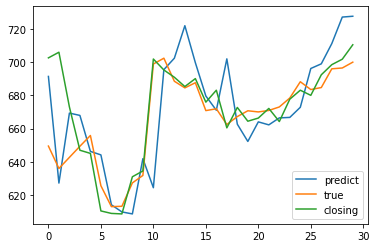

In [85]:
plt.plot(act_p,label="predict")
plt.plot(act,label="true")
plt.plot(con_closing,label="closing")
plt.legend()
plt.show()

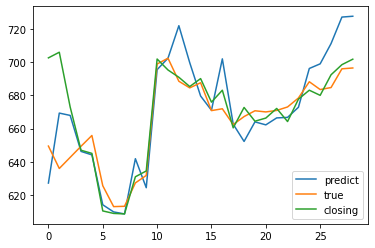

In [86]:
plt.plot(act_p[1:],label="predict")
plt.plot(act[:-1],label="true")
plt.plot(con_closing[:-1],label="closing")
plt.legend()
plt.show()

In [87]:
count=0
for i in range(30):
    if abs((con[i]-con_p[i])/con[i])<0.02:
        count+=1
    # else:
    #     print(i)
count/30

0.7333333333333333

In [88]:
count=0
for i in range(30):
    if abs((act[i]-act_p[i])/act[i])<0.02:
        count+=1
    # else:
    #     print(i)
count/30

0.5

In [96]:
diff=0
for i in range(30):
    diff+=abs((con[i]-con_p[i])/con[i])
(diff/30)

0.015269023683395866

In [90]:
diff=0
for i in range(30):
    diff+=((act[i]-act_p[i])/act[i])**2
(diff/30)**0.5

0.03409439883406421